In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from twod_object import TwoDObject
from simulation import Simulation
from kalmanfilter2 import KalmanFilter
# import array_to_latex as a2l

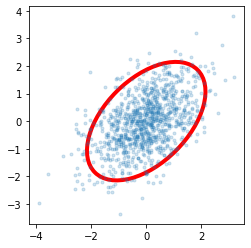

In [2]:
def ellipse(mean, cov, p):
    s = -2 * math.log(1 - p)
    X = np.random.multivariate_normal(mean, cov, 1000)
    plt.plot(X[:,0], X[:,1], marker = '.', linewidth = 0, alpha = 0.20)
    axes=plt.gca()
    axes.set_aspect(1)

    w, v = np.linalg.eig(s*cov)
    w = np.sqrt(w)
    ang = math.atan2(v[0,0], v[1,0]) / math.pi * 180
    ellipse = Ellipse(xy=(0, 0), width= 2 * w[0], height= 2 * w[1], angle = ang, edgecolor='r', fc='none', lw=4)

    axes.add_patch(ellipse)
    plt.show()
mean = (0,0)
cov = np.array([[1, 0.5], [0.5, 1]])
ellipse(mean, cov, 0.90)


In [3]:
td = TwoDObject(np.array([[1,1,1,1]]).T, 0.1, 0.1,0.1, 0.2)
cov = td.Q[2:,2:]
print(cov)

[[0.1 0. ]
 [0.  0.1]]


In [4]:
sim = Simulation(td, KalmanFilter, 30)

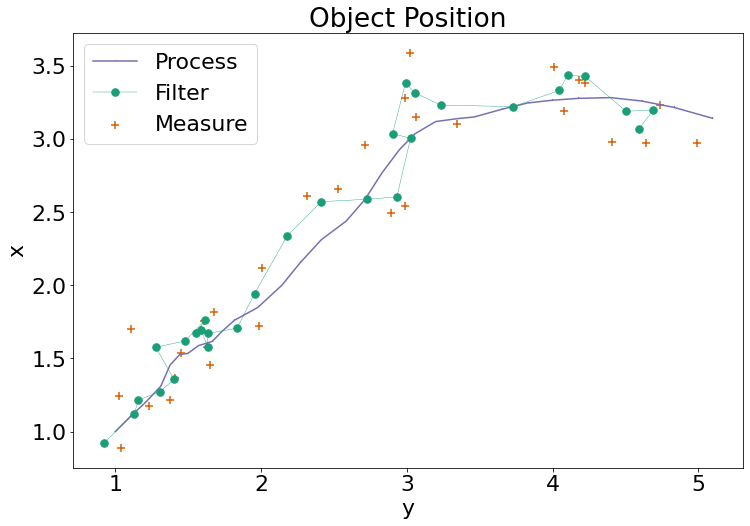

In [5]:
sim.generate(30)
sim.predict()
sim.plot()